In [232]:
import pandas as pd
df = pd.read_csv('parking_meters_rates.csv')

In [233]:
df.head()

,id,location,location_type,latitude,longitude,status,zone,all_groups,guid,in_service_utc,rate,max_hours,hours,restrictions,special_events,rate_as_of
0,410168-SCHEDR4402,SCHENLEY DR,On street,40.440574,-79.948103,Removed,410 - Oakland 4,CMU Study|410 - Oakland 4|Z - Inactive/Removed...,EE7C4FB7-038A-461A-A667-002870BA4155,2012-08-27T11:24:43,NaN,NaN,NaN,NaN,NaN,2019-01-29
1,421009-CEDAR-0302,CEDAR AVE,On street,40.451356,-80.001150,Active,421 - NorthSide,NORTHSIDE|421 - NorthSide,5BAC585B-FE5C-4090-ABF8-005D6C670EF1,2013-08-08T11:34:15,$1/hr,4 HRS,"M-Sat, 8a-6p","M-F, 7AM-9AM",NaN,2019-01-29
2,409242-NDTHRG0106,N DITHRIDGE ST,On street,40.448784,-79.951793,Active,409 - Oakland 3,409 - Oakland 3|OAKLAND3,F4BDCD95-6853-413F-A1C6-009AF3F9D725,2012-09-04T16:08:27,$3/hr,No Max,"M-Sat, 8a-6p",NaN,NaN,2019-01-29
3,PBP412,Virtual Terminal for ParkMobile,Virtual Zone,NaN,NaN,Active,412 - East Liberty,EASTLIB,8FAADCCE-A7BD-4988-85FC-00DCAB30782C,2015-10-23T16:56:58,NaN,NaN,NaN,NaN,NaN,2019-01-29
4,426002-CENTRE1802,CENTRE AVE,On street,40.442621,-79.982096,Active,426 - Hill District,Hill District|426 - Hill District|HILL-DIST,DFCD9083-EE1C-477D-8F82-00F688A1F78C,2017-07-17T11:24:27,$1/hr,2 HRS,"M-Sat, 8a-6p",NaN,NaN,2019-01-29


In [234]:
only_active = df[df['status'] == 'Active']
active_on_streets = only_active[only_active['location_type'] == 'On street']

for index, row in active_on_streets.iterrows():
    
    new_name = row['zone'].split(' - ')[1]
    active_on_streets.at[index,'zone'] = new_name

active_on_streets.head()

,id,location,location_type,latitude,longitude,status,zone,all_groups,guid,in_service_utc,rate,max_hours,hours,restrictions,special_events,rate_as_of
1,421009-CEDAR-0302,CEDAR AVE,On street,40.451356,-80.001150,Active,NorthSide,NORTHSIDE|421 - NorthSide,5BAC585B-FE5C-4090-ABF8-005D6C670EF1,2013-08-08T11:34:15,$1/hr,4 HRS,"M-Sat, 8a-6p","M-F, 7AM-9AM",NaN,2019-01-29
2,409242-NDTHRG0106,N DITHRIDGE ST,On street,40.448784,-79.951793,Active,Oakland 3,409 - Oakland 3|OAKLAND3,F4BDCD95-6853-413F-A1C6-009AF3F9D725,2012-09-04T16:08:27,$3/hr,No Max,"M-Sat, 8a-6p",NaN,NaN,2019-01-29
4,426002-CENTRE1802,CENTRE AVE,On street,40.442621,-79.982096,Active,Hill District,Hill District|426 - Hill District|HILL-DIST,DFCD9083-EE1C-477D-8F82-00F688A1F78C,2017-07-17T11:24:27,$1/hr,2 HRS,"M-Sat, 8a-6p",NaN,NaN,2019-01-29
5,407118-MEYRAN0203,MEYRAN AVE,On street,40.439856,-79.957367,Active,Oakland 1,OAKLAND1|407 - Oakland 1,E28258E3-6228-4B8C-AD29-012D6AE53A30,2012-08-13T12:25:00,$3/hr,No Max,"M-Sat, 8a-6p",NaN,NaN,2019-01-29
6,402403-BLVDAL0004,BLVD OF ALLIES,On street,40.439707,-80.005472,Active,Downtown 2,402 - Downtown 2|DOWNTOWN2,27D7B43B-71C7-48F2-A124-0193C266B650,2012-11-05T15:37:19,$4/hr,No Max,"M-Sat, 8a-6p","M-F, 7AM-9AM, 4PM-6PM",NaN,2019-01-29


In [235]:
print(active_on_streets['rate'].value_counts())

$1.50/hr                  376
$1/hr                     253
$3/hr                     172
$4/hr                      96
$.50/hr                    12
$2.50/hr                   11
$1.50($2 after 2pm)/hr     10
$3($2.50 after 2pm)/hr     10
$1.75/hr                   10
$2/hr                       4
Multi-Rate                  4
Name: rate, dtype: int64


In [236]:
active_on_streets_min = active_on_streets[['zone', 'rate']]

In [237]:
active_on_streets_min.head(20)

,zone,rate
1,NorthSide,$1/hr
2,Oakland 3,$3/hr
4,Hill District,$1/hr
5,Oakland 1,$3/hr
6,Downtown 2,$4/hr
7,SS & SSW,$1.50/hr
8,NorthSide,$1/hr
9,SS & SSW,$1.50/hr
10,Strip Disctrict,$1.50/hr
11,Downtown 1,$4/hr


In [238]:
zones_dic = {
    
    'Downtown 2' : 'Downtown',
    'Downtown 1' : 'Downtown',
    'Oakland 1' : 'South Oakland',
    'Oakland 2' : 'Pitt Campus Oakland', #Pitt campus
    'Oakland 3' : 'North Oakland',
    'Oakland 4' : 'Central Oakland',
    'SS & SSW' : 'South Side',
}

rates_dic = {
    '$1.50/hr' : 1.5,
    '$1/hr' : 1,
    '$3/hr' : 3,
    '$4/hr' : 4,
    '$.50/hr' :  0.5,
    '$2.50/hr' : 2.5,
    '$1.50($2 after 2pm)/hr' : 1.5,
    '$3($2.50 after 2pm)/hr' : 3,
    '$1.75/hr' : 1.75,
    '$2/hr' : 2,
    
}

combined_df = active_on_streets_min
combined_df['zone'].replace(zones_dic, inplace=True)
combined_df = combined_df[combined_df.rate != 'Multi-Rate']
combined_df['rate'].replace(rates_dic, inplace=True)

C:\Users\drewa\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [239]:
combined_df.head()

,zone,rate
1,NorthSide,1.0
2,North Oakland,3.0
4,Hill District,1.0
5,South Oakland,3.0
6,Downtown,4.0


In [240]:
meter_counts = combined_df.groupby('zone')['rate'].count()
print(meter_counts)
len(meter_counts)

zone
Allentown                  3
Bakery Sq                  3
Beechview                  8
Bloomfield (On-street)    68
Brookline                 21
Carrick                    9
Central Oakland           45
Downtown                  96
East Liberty              55
Hill District              4
Knoxville                  6
Lawrenceville             27
Mellon Park                4
Mt. Washington            17
North Oakland             60
NorthSide                 91
Northshore                38
Pitt Campus Oakland       37
Shadyside                 51
South Oakland             31
South Side                99
Squirrel Hill             55
Strip Disctrict           50
Uptown                    70
West End                   6
Name: rate, dtype: int64


25

In [241]:
rate_averages = combined_df.groupby('zone')['rate'].mean()
print(rate_averages)
len(rate_averages)

zone
Allentown                 0.500000
Bakery Sq                 2.000000
Beechview                 1.000000
Bloomfield (On-street)    1.000000
Brookline                 1.000000
Carrick                   0.500000
Central Oakland           2.333333
Downtown                  4.000000
East Liberty              1.500000
Hill District             1.000000
Knoxville                 1.000000
Lawrenceville             1.000000
Mellon Park               1.000000
Mt. Washington            1.000000
North Oakland             3.000000
NorthSide                 1.000000
Northshore                3.000000
Pitt Campus Oakland       3.000000
Shadyside                 1.500000
South Oakland             3.000000
South Side                1.500000
Squirrel Hill             1.500000
Strip Disctrict           1.500000
Uptown                    1.500000
West End                  1.000000
Name: rate, dtype: float64


25

In [242]:
new_df = pd.DataFrame(list(zip(meter_counts.keys(), meter_counts, rate_averages)), columns=['neighborhood', 'num_meters', 'rate_average'])

In [243]:
new_df['meters_div_rate'] = new_df['num_meters'] / new_df['rate_average']
new_df

,neighborhood,num_meters,rate_average,meters_div_rate
0,Allentown,3,0.500000,6.000000
1,Bakery Sq,3,2.000000,1.500000
2,Beechview,8,1.000000,8.000000
3,Bloomfield (On-street),68,1.000000,68.000000
4,Brookline,21,1.000000,21.000000
5,Carrick,9,0.500000,18.000000
6,Central Oakland,45,2.333333,19.285714
7,Downtown,96,4.000000,24.000000
8,East Liberty,55,1.500000,36.666667
9,Hill District,4,1.000000,4.000000


In [244]:
new_df.sort_values(by='meters_div_rate', inplace=True)

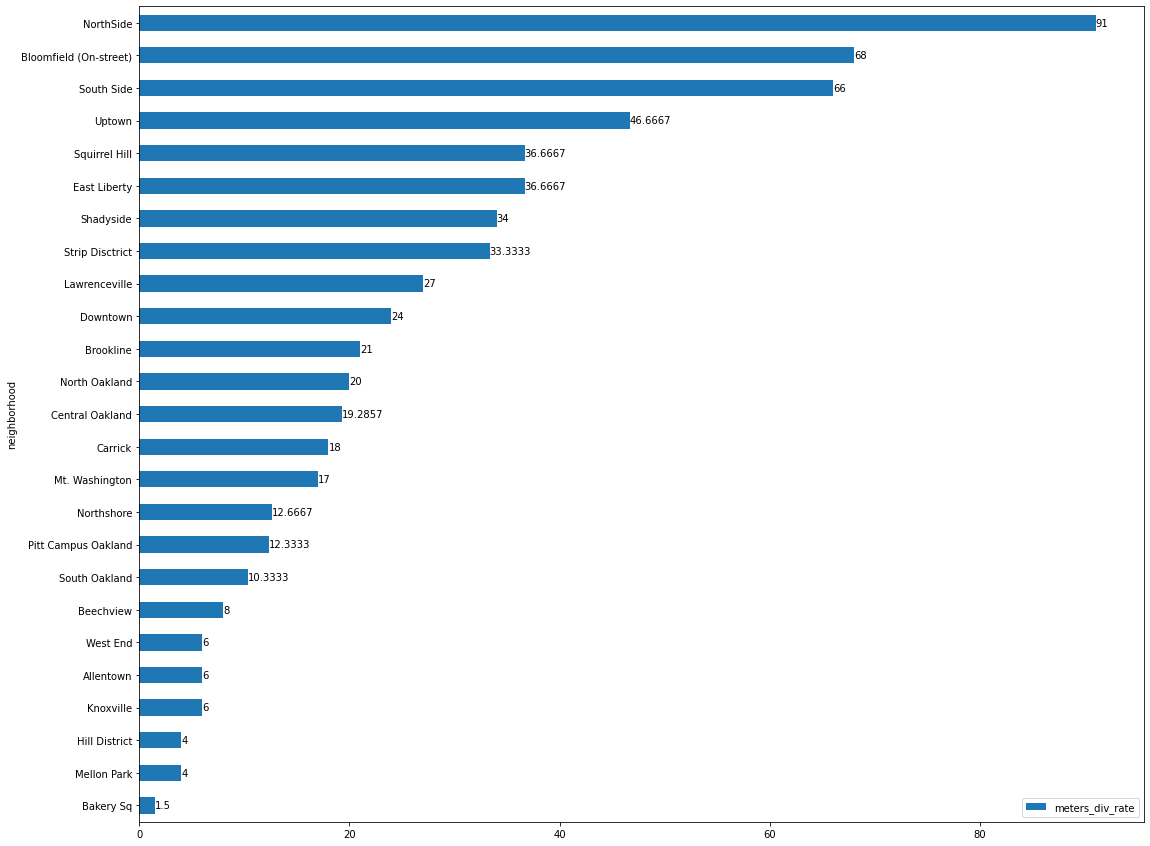

In [245]:
ax = new_df.plot.barh(x='neighborhood', y='meters_div_rate', figsize=(18,15))

for container in ax.containers:
    ax.bar_label(container)

In [246]:
new_df['score'] = new_df['meters_div_rate'] / 100
new_df.sort_values(by='score', inplace=True, ascending=False)
new_df

,neighborhood,num_meters,rate_average,meters_div_rate,score
15,NorthSide,91,1.000000,91.000000,0.910000
3,Bloomfield (On-street),68,1.000000,68.000000,0.680000
20,South Side,99,1.500000,66.000000,0.660000
23,Uptown,70,1.500000,46.666667,0.466667
21,Squirrel Hill,55,1.500000,36.666667,0.366667
8,East Liberty,55,1.500000,36.666667,0.366667
18,Shadyside,51,1.500000,34.000000,0.340000
22,Strip Disctrict,50,1.500000,33.333333,0.333333
11,Lawrenceville,27,1.000000,27.000000,0.270000
7,Downtown,96,4.000000,24.000000,0.240000


In [247]:
signs = pd.read_csv('signs.csv')
signs.head()

,id,mutcd_code,address_number,street,city,mounting_fixture,date_installed,description,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1673225887,R1-1,900,California Ave,Pittsburgh,Wood Pole,NaN,Stop,California-Kirkbride,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-9,40.459325,-80.019057
1,668379452,R1-1,107,Glenbury St,Pittsburgh,Channel,NaN,Stop,Overbrook,4.0,32.0,4.200332e+10,5.0,32.0,3.0,4-25,40.386955,-80.002161
2,174468442,R1-1,5325,Forbes Ave,Pittsburgh,Wood Pole,NaN,Stop,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.439828,-79.934814
3,1517107112,R1-1,1437,N St Clair St,Pittsburgh,Channel,NaN,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478685,-79.919270
4,1374142598,WF,228,Isabella St,Pittsburgh,Metal Pole,1995-02-14,Wayfinding Signage,North Shore,1.0,22.0,4.200356e+10,6.0,22.0,1.0,1-20,40.448482,-80.000671


In [248]:
signs = signs[['description', 'neighborhood']]
signs.head()

,description,neighborhood
0,Stop,California-Kirkbride
1,Stop,Overbrook
2,Stop,Squirrel Hill North
3,Stop,Highland Park
4,Wayfinding Signage,North Shore


In [249]:
signs['description'].value_counts()

No Parking Anytime                     10747
Stop                                    8381
Speed Limit                             4217
Handicapped Parking                     3232
No Parking Or Stopping                  2881
                                       ...  
Advance Turn Arrow                         1
Right Lane Must Exit                       1
Interpretative                             1
Bicycle Regulatory                         1
School Speed Limit XX When Flashing        1
Name: description, Length: 269, dtype: int64

In [250]:
no_parking = signs['description'].str.contains('No Parking')

In [257]:
no_parking_counts = signs.groupby('neighborhood')['description'].count().sort_values()

In [258]:
no_parking_counts

neighborhood
Mount Oliver Borough           17
Arlington Heights              21
Glen Hazel                     38
Chartiers City                 44
Ridgemont                      62
                             ... 
Squirrel Hill South          3280
Shadyside                    3367
Central Business District    3472
Bloomfield                   3622
South Side Flats             3656
Name: description, Length: 91, dtype: int64

In [261]:
parking_df = pd.DataFrame(list(zip(no_parking_counts.keys(), no_parking_counts)), columns=['neighborhood', 'num_no_parking_signs'])

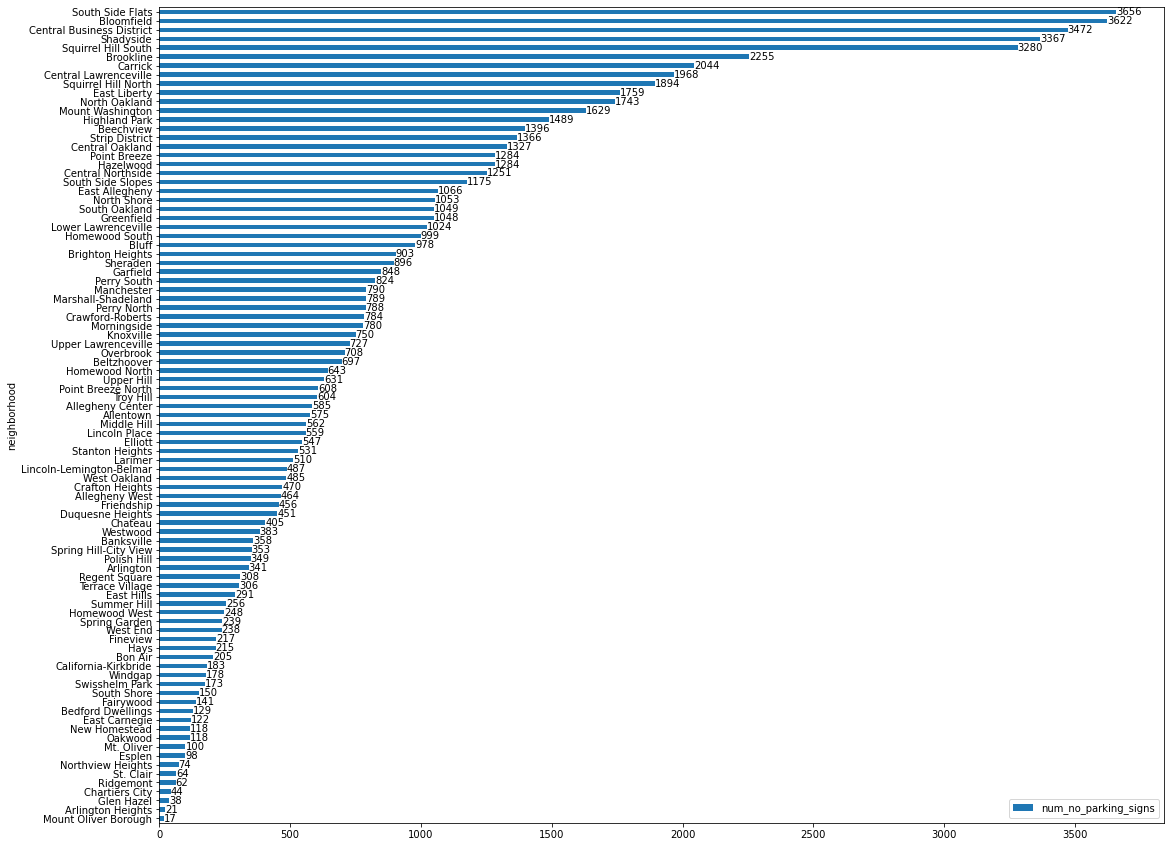

In [262]:
ax = parking_df.plot.barh(x='neighborhood', y='num_no_parking_signs', figsize=(18,15))

for container in ax.containers:
    ax.bar_label(container)

In [263]:
parking_df['parking_sign_score'] = 1 - parking_df['num_no_parking_signs']/3656

In [266]:
parking_df.head(50)

,neighborhood,num_no_parking_signs,parking_sign_score
0,Mount Oliver Borough,17,0.995350
1,Arlington Heights,21,0.994256
2,Glen Hazel,38,0.989606
3,Chartiers City,44,0.987965
4,Ridgemont,62,0.983042
5,St. Clair,64,0.982495
6,Northview Heights,74,0.979759
7,Esplen,98,0.973195
8,Mt. Oliver,100,0.972648
9,Oakwood,118,0.967724
